The following code was used to conduct our preliminary analysis of the 25,000 patents we sampled from the larger HUPD dataset to determine if the “filing date,” “examiner art unit,” “ipc label”, “foreign,” “small entity indicator,” and “aia first to file” metadata variables were actually correlated with patent acceptance rate. 

METADATA PLOTS

In [ ]:
!pip install datasets
!pip install transformers
!pip install huggingface_hub

import torch
from pprint import pprint
from datasets import load_dataset
from huggingface_hub import hf_hub_download
import numpy
import pandas as pd
import math
import matplotlib.pyplot as plt
import os
import json

In [ ]:
hf_hub_download(repo_id="egm517/hupd_augmented", filename="data/2016_all.tar.gz", repo_type="dataset")

Downloading:   0%|          | 0.00/5.57G [00:00<?, ?B/s]

'/root/.cache/huggingface/hub/datasets--egm517--hupd_augmented/snapshots/65570bc1d5e12e29647fd99b34169179772486c0/data/2016_all.tar.gz'

In [ ]:
!tar -xvf /root/.cache/huggingface/hub/datasets--egm517--hupd_augmented/snapshots/65570bc1d5e12e29647fd99b34169179772486c0/data/2016_all.tar.gz

In [ ]:
#get ground truth decision, examiner id, application number, and filing date from inside patent JSON
count = 0
app_num_to_ground_truth_decision_2D_arr = []
for filename in os.listdir('/content/2016_these/2016'):
  with open('/content/2016_these/2016/' + filename, 'r') as f:
    patent = json.load(f)
    app_num = filename[:-5]
    app_num_to_ground_truth_decision_2D_arr.append([app_num, patent["decision"], patent['examiner_id'], patent['filing_date']])

  count += 1
  print(count)

In [ ]:
metadata_path = hf_hub_download(repo_id="egm517/hupd_augmented", filename="hupd_metadata_2016.feather", repo_type="dataset")

In [ ]:
json_df = pd.DataFrame(app_num_to_ground_truth_decision_2D_arr, columns =['application_number', 'ground_truth_decision', 'examiner_id', 'filing_date'])
display(json_df)

,application_number,ground_truth_decision,examiner_id,filing_date
0,15389401,PENDING,88896.0,20161222
1,15350954,PENDING,96468.0,20161114
2,15396434,PENDING,67574.0,20161231
3,15073446,ACCEPTED,98153.0,20160317
4,15115089,ACCEPTED,98087.0,20160728
...,...,...,...,...
373250,15016415,PENDING,60099.0,20160205
373251,15377302,ACCEPTED,98768.0,20161213
373252,15370900,PENDING,58724.0,20161206
373253,15320402,PENDING,99900.0,20161220


In [ ]:
metadata_big_df = pd.read_feather(metadata_path)

In [ ]:
display(metadata_big_df)

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,confirm_number,atty_docket_number,appl_status_desc,...,date_application_produced,date_application_published,main_cpc_label,cpc_labels,main_ipcr_label,ipcr_labels,foreign,continuation,decision,decision_as_of_2020
3833253,14986639,2016-01-01,Utility,"SHAKERI, HADI",3727,081,003090,8129.0,None,Abandoned -- Failure to Pay Issue Fee,...,2017-06-21,2017-07-06,B67B7406,B67B7406,B67B740,B67B740,False,0,REJECTED,REJECTED
3833240,14986620,2016-01-01,Utility,"OTTON, ALICIA L",1699,548,400000,2470.0,MQN-0007,Patented Case,...,2016-04-27,2016-05-12,A61K31704,"A61K31704, A61K4506, A61K4748215, A61K4748061,...",A61K31704,"A61K31704, A61K4748, A61K31136, A61K4506",False,1,CONT-ACCEPTED,CONT-ACCEPTED
3833244,14986628,2016-01-01,Utility,"HUMPHREY, MICHAEL C",3715,434,350000,9715.0,ABN,Abandoned -- Failure to Respond to an Office A...,...,2016-04-13,2016-04-28,G09B702,"G09B702, G09B1900",G09B702,"G09B702, G09B1900",True,1,CONT-REJECTED,CONT-REJECTED
3833243,14986624,2016-01-01,Utility,"ROONEY, NORA MAUREEN",1644,424,133100,1041.0,09-373-US-DIV,Abandoned -- Failure to Respond to an Office A...,...,2016-04-27,2016-05-12,C07K162887,"C07K162887, C07K1470596",C07K1628,"C07K1628, C07K14705",False,1,CONT-REJECTED,CONT-REJECTED
3833242,14986623,2016-01-01,Utility,"KANE, KATHARINE GRACZ",3732,036,083000,1365.0,91802-2 CON,Abandoned -- Failure to Respond to an Office A...,...,2016-04-13,2016-04-28,A43C1100,"A43C1100, A43B1314, A43B3248, A43B30005, A43B2...",A43C1100,"A43C1100, A43B2302, A43B300, A43B1314, A43B324",False,1,CONT-ACCEPTED,CONT-REJECTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197364,15396426,2016-12-31,Utility,"SHIAU, SHEN C",2174,715,741000,3911.0,36FB-180404,Notice of Allowance Mailed -- Application Rece...,...,2018-06-20,2018-07-05,G06F17241,"G06F17241, G06F3013",G06F1724,"G06F1724, G06F301",False,0,PENDING,PENDING
4197365,15396427,2016-12-31,Utility,"FRISBY, KESHA",3715,434,113000,5614.0,TR01.OF002,Patented Case,...,2017-10-11,2017-10-26,G09B21004,"G09B21004, G09B21006, H04M10202",G09B2100,"G09B2100, H04M102, G09B2100",True,0,ACCEPTED,ACCEPTED
4197366,15396428,2016-12-31,Utility,"KING, GEORGE G",2872,351,158000,1070.0,IPVCP003X1C1X1C2,Abandoned -- Failure to Respond to an Office A...,...,2017-05-10,2017-05-25,G02C1110,"G02C1110, F21V330004, F21W211110",G02C1100,"G02C1100, F21V3300",False,1,CONT-REJECTED,CONT-REJECTED
4197367,15396429,2016-12-31,Utility,"TAYLOR, SAKINAH W",2497,726,001000,3823.0,FOR-217,Notice of Allowance Mailed -- Application Rece...,...,2018-06-20,2018-07-05,H04L630227,"H04L630227, H04L6712, H04L6710, H04L6702, H04L...",H04L2906,"H04L2906, H04L2908",False,1,CONT-ACCEPTED,CONT-PENDING


In [ ]:
metadata_2016 = pd.merge(json_df, metadata_big_df, how='outer', on = 'application_number').drop(columns = ["filing_date_y"]).rename(columns={"filing_date_x": 'filing_date'})

In [ ]:
metadata_2016['IPC_subclass'] = metadata_2016['main_ipcr_label'].str.slice(0, 4)

In [ ]:
display(metadata_2016.sort_values(by = ["filing_date"]))

,Unnamed: 0,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,confirm_number,atty_docket_number,...,main_cpc_label,cpc_labels,main_ipcr_label,ipcr_labels,foreign,continuation,decision,decision_as_of_2020,ground_truth_decision,IPC_subclass
0,0,14986622,2016-01-01,Utility,"REESE, HEIDI L",1625,514,212070,6650.0,NaN,...,A61K3155,"A61K3155, A61K31185, A61K31192, A61K31444",A61K3155,"A61K3155, A61K31192, A61K31444, A61K31185",False,1.0,CONT-REJECTED,CONT-REJECTED,REJECTED,A61K
1,1,14986644,2016-01-01,Utility,"VELEZ-LOPEZ, MARIO M",2144,715,226000,7467.0,ZS202-16448,...,G06F17248,"G06F17248, G06F17243, G06F172735",G06F1724,"G06F1724, G06F1727",False,0.0,PENDING,ACCEPTED,ACCEPTED,G06F
2,2,14986650,2016-01-01,Utility,"RODDEN, JOSHUA E",3649,206,372000,8711.0,NaN,...,B25H302,"B25H302, B62B316, B62B3002",B25H302,"B25H302, B62B300, B62B316",False,0.0,PENDING,ACCEPTED,ACCEPTED,B25H
3,3,14986639,2016-01-01,Utility,"SHAKERI, HADI",3727,081,003090,8129.0,NaN,...,B67B7406,B67B7406,B67B740,B67B740,False,0.0,REJECTED,REJECTED,REJECTED,B67B
7,7,14986666,2016-01-02,Utility,"FAN, SHIOW-JY",2168,707,780000,6324.0,END920130003US2 (1041.069,...,G06F1730401,"G06F1730401, G06F1730542",G06F1730,G06F1730,False,1.0,CONT-PENDING,CONT-ACCEPTED,ACCEPTED,G06F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29966,29966,15395007,2016-12-30,Utility,"WILLIAMS, MAURICE L",3611.0,280,287000,6143.0,50VJ-249993,...,B62K15008,"B62K15008, B62K304, B62H500, B62H300, B62J602,...",B62K1500,"B62K1500, B62H500, B62M665, B62J602, B62J9900,...",False,0.0,REJECTED,REJECTED,REJECTED,B62K
29953,29953,15396131,2016-12-30,Utility,"GIDDINS, NELSON S",2437.0,726,007000,2728.0,TW-SYA-0678CIP,...,H04L63083,"H04L63083, G06K1910",H04L2906,"H04L2906, G06K1910",False,1.0,CONT-ACCEPTED,CONT-ACCEPTED,ACCEPTED,H04L
29998,29998,15396655,2016-12-31,Utility,"HICKS, ROBERT J",3728.0,220,757000,6337.0,TRUDES.P003c,...,B44D314,"B44D314, B65D2538, B01F1500662, B65D2552",B44D314,"B44D314, B01F1500, B65D2552, B65D2538",False,1.0,CONT-REJECTED,CONT-REJECTED,REJECTED,B44D
29997,29997,15396620,2016-12-31,Utility,"MARC, MCDIEUNEL",3667.0,701,002000,8496.0,8322-54,...,G07C5008,"G07C5008, B60W5008, G08G1017, G07B15063, B60W4...",G07C500,"G07C500, G08G1017, B60W4008, G01C2136, G08G109...",False,0.0,PENDING,ACCEPTED,ACCEPTED,G07C


FILING DATE:

In [ ]:
#bin by month
#cols: month, total % accepted over that month
decision_to_str = {
      'REJECTED': 0, 
      'ACCEPTED': 1, 
      'PENDING': 2, 
      'CONT-REJECTED': 3, 
      'CONT-ACCEPTED': 4, 
      'CONT-PENDING': 5
  }

def map_filing_date_to_month(date):
  month = date[4:6]
  return month

metadata_2016_filing_date = all_metadata_2016_df[["filing_date", "ground_truth_decision"]]

for index, row in metadata_2016_filing_date.iterrows():
  metadata_2016_filing_date.at[index, 'month'] = map_filing_date_to_month(row["filing_date"])
  metadata_2016_filing_date.at[index, 'total_count'] = 1
  if row["ground_truth_decision"] == "ACCEPTED":
    metadata_2016_filing_date.at[index, 'accept_count'] = 1
    metadata_2016_filing_date.at[index, 'reject_count'] = 0
  if row["ground_truth_decision"] == "REJECTED":
    metadata_2016_filing_date.at[index, 'reject_count'] = 1
    metadata_2016_filing_date.at[index, 'accept_count'] = 0
  if row["ground_truth_decision"] != "REJECTED" and row["ground_truth_decision"] != "ACCEPTED":
    metadata_2016_filing_date.at[index, 'reject_count'] = 0
    metadata_2016_filing_date.at[index, 'accept_count'] = 0

metadata_2016_filing_date["output"] = metadata_2016_filing_date['ground_truth_decision'].map(decision_to_str)

display(metadata_2016_filing_date)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-32-a647b4068bdf>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,filing_date,ground_truth_decision,month,total_count,reject_count,accept_count,output
0,20161222,PENDING,12,1.0,0.0,0.0,2
1,20161114,PENDING,11,1.0,0.0,0.0,2
2,20161231,PENDING,12,1.0,0.0,0.0,2
3,20160317,ACCEPTED,03,1.0,0.0,1.0,1
4,20160728,ACCEPTED,07,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...
373250,20160205,PENDING,02,1.0,0.0,0.0,2
373251,20161213,ACCEPTED,12,1.0,0.0,1.0,1
373252,20161206,PENDING,12,1.0,0.0,0.0,2
373253,20161220,PENDING,12,1.0,0.0,0.0,2


In [ ]:
metadata_2016_filing_date = metadata_2016_filing_date[["month", "total_count", "reject_count", "accept_count"]].groupby("month").sum()

In [ ]:
display(metadata_2016_filing_date)

,total_count,reject_count,accept_count
month,,,
01,26808.0,2975.0,11532.0
02,29082.0,2967.0,12332.0
03,34841.0,3042.0,13912.0
04,29296.0,2454.0,10823.0
05,29961.0,2212.0,10527.0
06,34986.0,2179.0,11209.0
07,27824.0,1612.0,8336.0
08,32808.0,2227.0,9082.0
09,33882.0,1437.0,8388.0


In [ ]:
metadata_2016_filing_date["percent_accepted"] = metadata_2016_filing_date["accept_count"].div(metadata_2016_filing_date["total_count"]).apply(lambda x: x*100)
display(metadata_2016_filing_date)

,total_count,reject_count,accept_count,percent_accepted
month,,,,
01,26808.0,2975.0,11532.0,43.017010
02,29082.0,2967.0,12332.0,42.404236
03,34841.0,3042.0,13912.0,39.929968
04,29296.0,2454.0,10823.0,36.943610
05,29961.0,2212.0,10527.0,35.135676
06,34986.0,2179.0,11209.0,32.038530
07,27824.0,1612.0,8336.0,29.959747
08,32808.0,2227.0,9082.0,27.682273
09,33882.0,1437.0,8388.0,24.756508


Text(0.5, 0, 'Month')

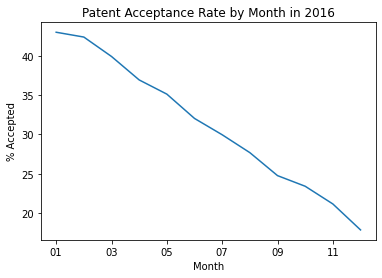

In [ ]:
ax = metadata_2016_filing_date["percent_accepted"].plot(kind='line', title='Patent Acceptance Rate by Month in 2016')
ax.set_ylabel("% Accepted")
ax.set_xlabel("Month")

FOREIGN

In [ ]:
#bin by month
#cols: month, total % accepted over that month
decision_to_str = {
      'REJECTED': 0, 
      'ACCEPTED': 1, 
      'PENDING': 2, 
      'CONT-REJECTED': 3, 
      'CONT-ACCEPTED': 4, 
      'CONT-PENDING': 5
  }

def map_filing_date_to_month(date):
  month = date[4:6]
  return month

metadata_2016_filing_date = all_metadata_2016_df[["filing_date", "ground_truth_decision", "foreign"]]

for index, row in metadata_2016_filing_date.iterrows():
  metadata_2016_filing_date.at[index, 'month'] = map_filing_date_to_month(row["filing_date"])
  metadata_2016_filing_date.at[index, 'total_count'] = 1
  if row["ground_truth_decision"] == "ACCEPTED":
    metadata_2016_filing_date.at[index, 'accept_count'] = 1
    metadata_2016_filing_date.at[index, 'reject_count'] = 0
  if row["ground_truth_decision"] == "REJECTED":
    metadata_2016_filing_date.at[index, 'reject_count'] = 1
    metadata_2016_filing_date.at[index, 'accept_count'] = 0
  if row["ground_truth_decision"] != "REJECTED" and row["ground_truth_decision"] != "ACCEPTED":
    metadata_2016_filing_date.at[index, 'reject_count'] = 0
    metadata_2016_filing_date.at[index, 'accept_count'] = 0
  if row["foreign"] == True:
    metadata_2016_filing_date.at[index, 'foreign_count'] = 1
    metadata_2016_filing_date.at[index, 'domestic_count'] = 0
  if row["foreign"] == False:
    metadata_2016_filing_date.at[index, 'foreign_count'] = 0
    metadata_2016_filing_date.at[index, 'domestic_count'] = 1

metadata_2016_filing_date["output"] = metadata_2016_filing_date['ground_truth_decision'].map(decision_to_str)

display(metadata_2016_filing_date)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-37-7a75489b94fa>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,filing_date,ground_truth_decision,foreign,month,total_count,reject_count,accept_count,foreign_count,domestic_count,output
0,20161222,PENDING,False,12,1.0,0.0,0.0,0.0,1.0,2
1,20161114,PENDING,False,11,1.0,0.0,0.0,0.0,1.0,2
2,20161231,PENDING,False,12,1.0,0.0,0.0,0.0,1.0,2
3,20160317,ACCEPTED,False,03,1.0,0.0,1.0,0.0,1.0,1
4,20160728,ACCEPTED,True,07,1.0,0.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
373250,20160205,PENDING,True,02,1.0,0.0,0.0,1.0,0.0,2
373251,20161213,ACCEPTED,True,12,1.0,0.0,1.0,1.0,0.0,1
373252,20161206,PENDING,False,12,1.0,0.0,0.0,0.0,1.0,2
373253,20161220,PENDING,False,12,1.0,0.0,0.0,0.0,1.0,2


In [ ]:
for index, row in metadata_2016_filing_date.iterrows():
  if row["accept_count"] == 1 and row["foreign_count"] == 1:
    metadata_2016_filing_date.at[index, 'foreign_accept_count'] = 1
    metadata_2016_filing_date.at[index, 'domestic_accept_count'] = 0
  if row["accept_count"] == 1 and row["domestic_count"] == 1:
    metadata_2016_filing_date.at[index, 'domestic_accept_count'] = 1
    metadata_2016_filing_date.at[index, 'foreign_accept_count'] = 0
  if row["reject_count"] == 1 and row["foreign_count"] == 1:
    metadata_2016_filing_date.at[index, 'foreign_accept_count'] = 0
    metadata_2016_filing_date.at[index, 'domestic_accept_count'] = 0
  if row["reject_count"] == 1 and row["domestic_count"] == 1:
    metadata_2016_filing_date.at[index, 'domestic_accept_count'] = 0
    metadata_2016_filing_date.at[index, 'foreign_accept_count'] = 0

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
metadata_2016_filing_date = metadata_2016_filing_date[["month",	"total_count", "reject_count",	"domestic_count", "accept_count",	"foreign_count",	'foreign_accept_count', 'domestic_accept_count', "output"]].groupby("month").sum()
display(metadata_2016_filing_date)

,total_count,reject_count,domestic_count,accept_count,foreign_count,foreign_accept_count,domestic_accept_count,output
month,,,,,,,,
01,26808.0,2975.0,15490.0,11532.0,11318.0,5186.0,6346.0,36134
02,29082.0,2967.0,17250.0,12332.0,11832.0,5452.0,6880.0,39898
03,34841.0,3042.0,20111.0,13912.0,14730.0,6515.0,7397.0,49686
04,29296.0,2454.0,17582.0,10823.0,11714.0,4770.0,6053.0,42861
05,29961.0,2212.0,18030.0,10527.0,11931.0,4555.0,5972.0,44971
06,34986.0,2179.0,20591.0,11209.0,14395.0,5026.0,6183.0,54405
07,27824.0,1612.0,16195.0,8336.0,11629.0,3778.0,4558.0,44088
08,32808.0,2227.0,19119.0,9082.0,13689.0,4063.0,5019.0,52080
09,33882.0,1437.0,19994.0,8388.0,13888.0,3731.0,4657.0,56502


In [ ]:
metadata_2016_filing_date["percent_foreign_accepted"] = metadata_2016_filing_date["foreign_accept_count"].div(metadata_2016_filing_date["foreign_count"]).apply(lambda x: x*100)
metadata_2016_filing_date["percent_domestic_accepted"] = metadata_2016_filing_date["domestic_accept_count"].div(metadata_2016_filing_date["domestic_count"]).apply(lambda x: x*100)
display(metadata_2016_filing_date)

,total_count,reject_count,domestic_count,accept_count,foreign_count,foreign_accept_count,domestic_accept_count,output,percent_foreign_accepted,percent_domestic_accepted
month,,,,,,,,,,
01,26808.0,2975.0,15490.0,11532.0,11318.0,5186.0,6346.0,36134,45.820816,40.968367
02,29082.0,2967.0,17250.0,12332.0,11832.0,5452.0,6880.0,39898,46.078431,39.884058
03,34841.0,3042.0,20111.0,13912.0,14730.0,6515.0,7397.0,49686,44.229464,36.780866
04,29296.0,2454.0,17582.0,10823.0,11714.0,4770.0,6053.0,42861,40.720505,34.427255
05,29961.0,2212.0,18030.0,10527.0,11931.0,4555.0,5972.0,44971,38.177856,33.122573
06,34986.0,2179.0,20591.0,11209.0,14395.0,5026.0,6183.0,54405,34.914901,30.027682
07,27824.0,1612.0,16195.0,8336.0,11629.0,3778.0,4558.0,44088,32.487746,28.144489
08,32808.0,2227.0,19119.0,9082.0,13689.0,4063.0,5019.0,52080,29.680766,26.251373
09,33882.0,1437.0,19994.0,8388.0,13888.0,3731.0,4657.0,56502,26.864919,23.291988


In [ ]:
metadata_2016_filing_date.columns

Index(['total_count', 'reject_count', 'domestic_count', 'accept_count',
       'foreign_count', 'foreign_accept_count', 'domestic_accept_count',
       'output', 'percent_foreign_accepted', 'percent_domestic_accepted'],
      dtype='object')

Text(0.5, 0, 'Month')

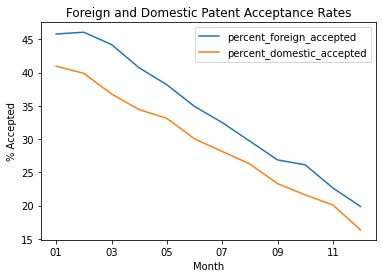

In [ ]:
ax = metadata_2016_filing_date[["percent_foreign_accepted", "percent_domestic_accepted"]].plot(kind='line', title='Foreign and Domestic Patent Acceptance Rates')
ax.set_ylabel("% Accepted")
ax.set_xlabel("Month")

SMALL ENTITY

In [ ]:
all_metadata_2016_df['small_entity_indicator'].unique()

array(['UNDISCOUNTED', 'MICRO', 'SMALL', None], dtype=object)

In [ ]:
#bin by month
#cols: month, total % accepted over that month
decision_to_str = {
      'REJECTED': 0, 
      'ACCEPTED': 1, 
      'PENDING': 2, 
      'CONT-REJECTED': 3, 
      'CONT-ACCEPTED': 4, 
      'CONT-PENDING': 5
  }

def map_filing_date_to_month(date):
  month = date[4:6]
  return month

metadata_2016_filing_date = all_metadata_2016_df[["filing_date", "ground_truth_decision", 'small_entity_indicator']]

for index, row in metadata_2016_filing_date.iterrows():
  metadata_2016_filing_date.at[index, 'month'] = map_filing_date_to_month(row["filing_date"])
  metadata_2016_filing_date.at[index, 'total_count'] = 1
  if row["ground_truth_decision"] == "ACCEPTED":
    metadata_2016_filing_date.at[index, 'accept_count'] = 1
    metadata_2016_filing_date.at[index, 'reject_count'] = 0
  if row["ground_truth_decision"] == "REJECTED":
    metadata_2016_filing_date.at[index, 'reject_count'] = 1
    metadata_2016_filing_date.at[index, 'accept_count'] = 0
  if row["ground_truth_decision"] != "REJECTED" and row["ground_truth_decision"] != "ACCEPTED":
    metadata_2016_filing_date.at[index, 'reject_count'] = 0
    metadata_2016_filing_date.at[index, 'accept_count'] = 0
  if row['small_entity_indicator'] == 'MICRO':
    metadata_2016_filing_date.at[index, 'micro_entity_count'] = 1
    metadata_2016_filing_date.at[index, 'small_entity_count'] = 0
    metadata_2016_filing_date.at[index, 'large_entity_count'] = 0
  if row['small_entity_indicator'] == 'SMALL':
    metadata_2016_filing_date.at[index, 'micro_entity_count'] = 0
    metadata_2016_filing_date.at[index, 'small_entity_count'] = 1
    metadata_2016_filing_date.at[index, 'large_entity_count'] = 0
  if row['small_entity_indicator'] != 'SMALL' and row['small_entity_indicator'] != 'MICRO':
    metadata_2016_filing_date.at[index, 'micro_entity_count'] = 0
    metadata_2016_filing_date.at[index, 'small_entity_count'] = 0
    metadata_2016_filing_date.at[index, 'large_entity_count'] = 1


metadata_2016_filing_date["output"] = metadata_2016_filing_date['ground_truth_decision'].map(decision_to_str)

display(metadata_2016_filing_date)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-52-78e906f10406>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,filing_date,ground_truth_decision,small_entity_indicator,month,total_count,reject_count,accept_count,micro_entity_count,small_entity_count,large_entity_count,output
0,20161222,PENDING,UNDISCOUNTED,12,1.0,0.0,0.0,0.0,0.0,1.0,2
1,20161114,PENDING,UNDISCOUNTED,11,1.0,0.0,0.0,0.0,0.0,1.0,2
2,20161231,PENDING,UNDISCOUNTED,12,1.0,0.0,0.0,0.0,0.0,1.0,2
3,20160317,ACCEPTED,MICRO,03,1.0,0.0,1.0,1.0,0.0,0.0,1
4,20160728,ACCEPTED,UNDISCOUNTED,07,1.0,0.0,1.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
373250,20160205,PENDING,UNDISCOUNTED,02,1.0,0.0,0.0,0.0,0.0,1.0,2
373251,20161213,ACCEPTED,UNDISCOUNTED,12,1.0,0.0,1.0,0.0,0.0,1.0,1
373252,20161206,PENDING,UNDISCOUNTED,12,1.0,0.0,0.0,0.0,0.0,1.0,2
373253,20161220,PENDING,UNDISCOUNTED,12,1.0,0.0,0.0,0.0,0.0,1.0,2


In [ ]:
for index, row in metadata_2016_filing_date.iterrows():
  if row["accept_count"] == 1 and row["micro_entity_count"] == 1:
    metadata_2016_filing_date.at[index, 'micro_entity_accept_count'] = 1
    metadata_2016_filing_date.at[index, 'small_entity_accept_count'] = 0
    metadata_2016_filing_date.at[index, 'large_entity_accept_count'] = 0
  if row["accept_count"] == 1 and row["small_entity_count"] == 1:
    metadata_2016_filing_date.at[index, 'micro_entity_accept_count'] = 0
    metadata_2016_filing_date.at[index, 'small_entity_accept_count'] = 1
    metadata_2016_filing_date.at[index, 'large_entity_accept_count'] = 0
  if row["accept_count"] == 1 and row["large_entity_count"] == 1:
    metadata_2016_filing_date.at[index, 'micro_entity_accept_count'] = 0
    metadata_2016_filing_date.at[index, 'small_entity_accept_count'] = 0
    metadata_2016_filing_date.at[index, 'large_entity_accept_count'] = 1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
metadata_2016_filing_date = metadata_2016_filing_date[["month",	"total_count", "reject_count", "accept_count",	"micro_entity_count", "small_entity_count",	"large_entity_count", 'micro_entity_accept_count', 'small_entity_accept_count',"large_entity_accept_count", "output"]].groupby("month").sum()
display(metadata_2016_filing_date)

,total_count,reject_count,accept_count,micro_entity_count,small_entity_count,large_entity_count,micro_entity_accept_count,small_entity_accept_count,large_entity_accept_count,output
month,,,,,,,,,,
01,26808.0,2975.0,11532.0,928.0,6010.0,19870.0,267.0,2143.0,9122.0,36134
02,29082.0,2967.0,12332.0,1039.0,6507.0,21536.0,297.0,2292.0,9743.0,39898
03,34841.0,3042.0,13912.0,1087.0,7219.0,26535.0,296.0,2352.0,11264.0,49686
04,29296.0,2454.0,10823.0,1045.0,6722.0,21529.0,253.0,2070.0,8500.0,42861
05,29961.0,2212.0,10527.0,1027.0,6822.0,22112.0,247.0,2034.0,8246.0,44971
06,34986.0,2179.0,11209.0,1092.0,7235.0,26659.0,232.0,2082.0,8895.0,54405
07,27824.0,1612.0,8336.0,936.0,6293.0,20595.0,192.0,1573.0,6571.0,44088
08,32808.0,2227.0,9082.0,1011.0,7114.0,24683.0,180.0,1739.0,7163.0,52080
09,33882.0,1437.0,8388.0,1028.0,7215.0,25639.0,185.0,1647.0,6556.0,56502


In [ ]:
metadata_2016_filing_date["percent_micro_entity_accepted"] = metadata_2016_filing_date["micro_entity_accept_count"].div(metadata_2016_filing_date["micro_entity_count"]).apply(lambda x: x*100)
metadata_2016_filing_date["percent_small_entity_accepted"] = metadata_2016_filing_date["small_entity_accept_count"].div(metadata_2016_filing_date["small_entity_count"]).apply(lambda x: x*100)
metadata_2016_filing_date["percent_large_entity_accepted"] = metadata_2016_filing_date["large_entity_accept_count"].div(metadata_2016_filing_date["large_entity_count"]).apply(lambda x: x*100)

display(metadata_2016_filing_date)

,total_count,reject_count,accept_count,micro_entity_count,small_entity_count,large_entity_count,micro_entity_accept_count,small_entity_accept_count,large_entity_accept_count,output,percent_micro_entity_accepted,percent_small_entity_accepted,percent_large_entity_accepted
month,,,,,,,,,,,,,
01,26808.0,2975.0,11532.0,928.0,6010.0,19870.0,267.0,2143.0,9122.0,36134,28.771552,35.657238,45.908405
02,29082.0,2967.0,12332.0,1039.0,6507.0,21536.0,297.0,2292.0,9743.0,39898,28.585178,35.223605,45.240527
03,34841.0,3042.0,13912.0,1087.0,7219.0,26535.0,296.0,2352.0,11264.0,49686,27.230911,32.580690,42.449595
04,29296.0,2454.0,10823.0,1045.0,6722.0,21529.0,253.0,2070.0,8500.0,42861,24.210526,30.794406,39.481629
05,29961.0,2212.0,10527.0,1027.0,6822.0,22112.0,247.0,2034.0,8246.0,44971,24.050633,29.815303,37.291968
06,34986.0,2179.0,11209.0,1092.0,7235.0,26659.0,232.0,2082.0,8895.0,54405,21.245421,28.776780,33.365843
07,27824.0,1612.0,8336.0,936.0,6293.0,20595.0,192.0,1573.0,6571.0,44088,20.512821,24.996027,31.905802
08,32808.0,2227.0,9082.0,1011.0,7114.0,24683.0,180.0,1739.0,7163.0,52080,17.804154,24.444757,29.019973
09,33882.0,1437.0,8388.0,1028.0,7215.0,25639.0,185.0,1647.0,6556.0,56502,17.996109,22.827443,25.570420


Text(0.5, 0, 'Month')

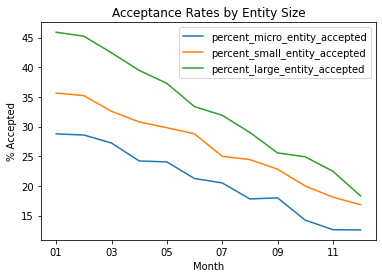

In [ ]:
ax = metadata_2016_filing_date[["percent_micro_entity_accepted", "percent_small_entity_accepted", "percent_large_entity_accepted"]].plot(kind='line', title='Acceptance Rates by Entity Size')
ax.set_ylabel("% Accepted")
ax.set_xlabel("Month")

FIRST TO FILE

In [ ]:
all_metadata_2016_df['aia_first_to_file'].unique()

array(['true', 'false', 'Other'], dtype=object)

In [ ]:
#bin by month
#cols: month, total % accepted over that month
decision_to_str = {
      'REJECTED': 0, 
      'ACCEPTED': 1, 
      'PENDING': 2, 
      'CONT-REJECTED': 3, 
      'CONT-ACCEPTED': 4, 
      'CONT-PENDING': 5
  }

def map_filing_date_to_month(date):
  month = date[4:6]
  return month

metadata_2016_filing_date = all_metadata_2016_df[["filing_date", "ground_truth_decision", 'aia_first_to_file']]

for index, row in metadata_2016_filing_date.iterrows():
  metadata_2016_filing_date.at[index, 'month'] = map_filing_date_to_month(row["filing_date"])
  metadata_2016_filing_date.at[index, 'total_count'] = 1
  if row["ground_truth_decision"] == "ACCEPTED":
    metadata_2016_filing_date.at[index, 'accept_count'] = 1
    metadata_2016_filing_date.at[index, 'reject_count'] = 0
  if row["ground_truth_decision"] == "REJECTED":
    metadata_2016_filing_date.at[index, 'reject_count'] = 1
    metadata_2016_filing_date.at[index, 'accept_count'] = 0
  if row["ground_truth_decision"] != "REJECTED" and row["ground_truth_decision"] != "ACCEPTED":
    metadata_2016_filing_date.at[index, 'reject_count'] = 0
    metadata_2016_filing_date.at[index, 'accept_count'] = 0
  if row['aia_first_to_file'] == 'true':
    metadata_2016_filing_date.at[index, 'true_count'] = 1
    metadata_2016_filing_date.at[index, 'false_count'] = 0
    metadata_2016_filing_date.at[index, 'other_count'] = 0
  if row['aia_first_to_file'] == 'false':
    metadata_2016_filing_date.at[index, 'true_count'] = 0
    metadata_2016_filing_date.at[index, 'false_count'] = 1
    metadata_2016_filing_date.at[index, 'other_count'] = 0
  if row['aia_first_to_file'] == 'Other':
    metadata_2016_filing_date.at[index, 'true_count'] = 0
    metadata_2016_filing_date.at[index, 'false_count'] = 0
    metadata_2016_filing_date.at[index, 'other_count'] = 1
  

metadata_2016_filing_date["output"] = metadata_2016_filing_date['ground_truth_decision'].map(decision_to_str)

display(metadata_2016_filing_date)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-58-922199813fa3>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,filing_date,ground_truth_decision,aia_first_to_file,month,total_count,reject_count,accept_count,true_count,false_count,other_count,output
0,20161222,PENDING,true,12,1.0,0.0,0.0,1.0,0.0,0.0,2
1,20161114,PENDING,false,11,1.0,0.0,0.0,0.0,1.0,0.0,2
2,20161231,PENDING,true,12,1.0,0.0,0.0,1.0,0.0,0.0,2
3,20160317,ACCEPTED,true,03,1.0,0.0,1.0,1.0,0.0,0.0,1
4,20160728,ACCEPTED,true,07,1.0,0.0,1.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
373250,20160205,PENDING,true,02,1.0,0.0,0.0,1.0,0.0,0.0,2
373251,20161213,ACCEPTED,true,12,1.0,0.0,1.0,1.0,0.0,0.0,1
373252,20161206,PENDING,true,12,1.0,0.0,0.0,1.0,0.0,0.0,2
373253,20161220,PENDING,true,12,1.0,0.0,0.0,1.0,0.0,0.0,2


In [ ]:
for index, row in metadata_2016_filing_date.iterrows():
  if row["accept_count"] == 1 and row["true_count"] == 1:
    metadata_2016_filing_date.at[index, 'true_accept_count'] = 1
    metadata_2016_filing_date.at[index, 'false_accept_count'] = 0
    metadata_2016_filing_date.at[index, 'other_accept_count'] = 0
  if row["accept_count"] == 1 and row["false_count"] == 1:
    metadata_2016_filing_date.at[index, 'true_accept_count'] = 0
    metadata_2016_filing_date.at[index, 'false_accept_count'] = 1
    metadata_2016_filing_date.at[index, 'other_accept_count'] = 0
  if row["accept_count"] == 1 and row["other_count"] == 1:
    metadata_2016_filing_date.at[index, 'true_accept_count'] = 0
    metadata_2016_filing_date.at[index, 'false_accept_count'] = 0
    metadata_2016_filing_date.at[index, 'other_accept_count'] = 1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
metadata_2016_filing_date = metadata_2016_filing_date[["month",	"total_count", "reject_count", "accept_count",	"true_count", "false_count",	"other_count", 'true_accept_count', 'false_accept_count',"other_accept_count", "output"]].groupby("month").sum()
display(metadata_2016_filing_date)

In [ ]:
metadata_2016_filing_date = metadata_2016_filing_date.drop(columns = ["other_count", "other_accept_count"])
display(metadata_2016_filing_date)

,total_count,reject_count,accept_count,true_count,false_count,true_accept_count,false_accept_count,output
month,,,,,,,,
01,26808.0,2975.0,11532.0,21837.0,4939.0,8916.0,2616.0,36134
02,29082.0,2967.0,12332.0,23750.0,5306.0,9555.0,2777.0,39898
03,34841.0,3042.0,13912.0,29550.0,5267.0,11258.0,2654.0,49686
04,29296.0,2454.0,10823.0,24466.0,4801.0,8488.0,2335.0,42861
05,29961.0,2212.0,10527.0,24884.0,5044.0,8167.0,2360.0,44971
06,34986.0,2179.0,11209.0,29844.0,5104.0,8937.0,2272.0,54405
07,27824.0,1612.0,8336.0,23436.0,4371.0,6500.0,1836.0,44088
08,32808.0,2227.0,9082.0,27665.0,5108.0,7066.0,2016.0,52080
09,33882.0,1437.0,8388.0,29369.0,4487.0,6709.0,1679.0,56502


In [ ]:
metadata_2016_filing_date["percent_FITF_accepted"] = metadata_2016_filing_date["true_accept_count"].div(metadata_2016_filing_date["true_count"]).apply(lambda x: x*100)
metadata_2016_filing_date["percent_not_FITF_accepted"] = metadata_2016_filing_date["false_accept_count"].div(metadata_2016_filing_date["false_count"]).apply(lambda x: x*100)

display(metadata_2016_filing_date)

,total_count,reject_count,accept_count,true_count,false_count,true_accept_count,false_accept_count,output,percent_ftf_accepted,percent_not_ftf_accepted,percent_FITF_accepted,percent_not_FITF_accepted
month,,,,,,,,,,,,
01,26808.0,2975.0,11532.0,21837.0,4939.0,8916.0,2616.0,36134,40.829784,52.966187,40.829784,52.966187
02,29082.0,2967.0,12332.0,23750.0,5306.0,9555.0,2777.0,39898,40.231579,52.336977,40.231579,52.336977
03,34841.0,3042.0,13912.0,29550.0,5267.0,11258.0,2654.0,49686,38.098139,50.389216,38.098139,50.389216
04,29296.0,2454.0,10823.0,24466.0,4801.0,8488.0,2335.0,42861,34.693043,48.635701,34.693043,48.635701
05,29961.0,2212.0,10527.0,24884.0,5044.0,8167.0,2360.0,44971,32.820286,46.788263,32.820286,46.788263
06,34986.0,2179.0,11209.0,29844.0,5104.0,8937.0,2272.0,54405,29.945718,44.514107,29.945718,44.514107
07,27824.0,1612.0,8336.0,23436.0,4371.0,6500.0,1836.0,44088,27.735108,42.004118,27.735108,42.004118
08,32808.0,2227.0,9082.0,27665.0,5108.0,7066.0,2016.0,52080,25.541298,39.467502,25.541298,39.467502
09,33882.0,1437.0,8388.0,29369.0,4487.0,6709.0,1679.0,56502,22.843815,37.419211,22.843815,37.419211


Text(0.5, 0, 'Month')

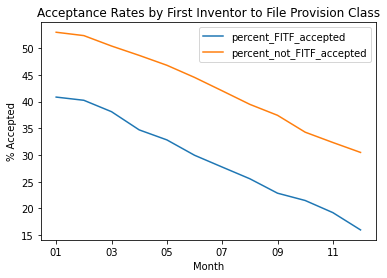

In [ ]:
ax = metadata_2016_filing_date[["percent_FITF_accepted", "percent_not_FITF_accepted"]].plot(kind='line', title='Acceptance Rates by First Inventor to File Provision Class')
ax.set_ylabel("% Accepted")
ax.set_xlabel("Month")

IPC SUBCLASS

In [ ]:
all_metadata_2016_df['IPC_subclass'] = all_metadata_2016_df['main_ipcr_label'].str.slice(0, 4)

In [ ]:
len(all_metadata_2016_df.IPC_subclass.unique())

604

We're gonna focus on either top 10 or top 5

In [ ]:
all_metadata_2016_df['IPC_subclass'].value_counts()[:5]

G06F    34604
H01L    20146
H04L    18747
A61K    12666
H04W    12561
Name: IPC_subclass, dtype: int64

In [ ]:
#bin by month
#cols: month, total % accepted over that month
decision_to_str = {
      'REJECTED': 0, 
      'ACCEPTED': 1, 
      'PENDING': 2, 
      'CONT-REJECTED': 3, 
      'CONT-ACCEPTED': 4, 
      'CONT-PENDING': 5
  }

def map_filing_date_to_month(date):
  month = date[4:6]
  return month

metadata_2016_filing_date = all_metadata_2016_df[["filing_date", "ground_truth_decision", 'IPC_subclass']]

for index, row in metadata_2016_filing_date.iterrows():
  metadata_2016_filing_date.at[index, 'month'] = map_filing_date_to_month(row["filing_date"])
  metadata_2016_filing_date.at[index, 'total_count'] = 1
  if row["ground_truth_decision"] == "ACCEPTED":
    metadata_2016_filing_date.at[index, 'accept_count'] = 1
    metadata_2016_filing_date.at[index, 'reject_count'] = 0
  if row["ground_truth_decision"] == "REJECTED":
    metadata_2016_filing_date.at[index, 'reject_count'] = 1
    metadata_2016_filing_date.at[index, 'accept_count'] = 0
  if row["ground_truth_decision"] != "REJECTED" and row["ground_truth_decision"] != "ACCEPTED":
    metadata_2016_filing_date.at[index, 'reject_count'] = 0
    metadata_2016_filing_date.at[index, 'accept_count'] = 0
  
  
  if row['IPC_subclass'] == 'G06F':
    metadata_2016_filing_date.at[index, 'G06F_count'] = 1
    metadata_2016_filing_date.at[index, 'H01L_count'] = 0
    metadata_2016_filing_date.at[index, 'H04L_count'] = 0
    metadata_2016_filing_date.at[index, 'A61K_count'] = 0
    metadata_2016_filing_date.at[index, 'H04W_count'] = 0

  if row['IPC_subclass'] == 'H01L':
    metadata_2016_filing_date.at[index, 'G06F_count'] = 0
    metadata_2016_filing_date.at[index, 'H01L_count'] = 1
    metadata_2016_filing_date.at[index, 'H04L_count'] = 0
    metadata_2016_filing_date.at[index, 'A61K_count'] = 0
    metadata_2016_filing_date.at[index, 'H04W_count'] = 0

  if row['IPC_subclass'] == 'H04L':
    metadata_2016_filing_date.at[index, 'G06F_count'] = 0
    metadata_2016_filing_date.at[index, 'H01L_count'] = 0
    metadata_2016_filing_date.at[index, 'H04L_count'] = 1
    metadata_2016_filing_date.at[index, 'A61K_count'] = 0
    metadata_2016_filing_date.at[index, 'H04W_count'] = 0

  if row['IPC_subclass'] == 'A61K':
    metadata_2016_filing_date.at[index, 'G06F_count'] = 0
    metadata_2016_filing_date.at[index, 'H01L_count'] = 0
    metadata_2016_filing_date.at[index, 'H04L_count'] = 0
    metadata_2016_filing_date.at[index, 'A61K_count'] = 1
    metadata_2016_filing_date.at[index, 'H04W_count'] = 0

  if row['IPC_subclass'] == 'H04W':
    metadata_2016_filing_date.at[index, 'G06F_count'] = 0
    metadata_2016_filing_date.at[index, 'H01L_count'] = 0
    metadata_2016_filing_date.at[index, 'H04L_count'] = 0
    metadata_2016_filing_date.at[index, 'A61K_count'] = 0
    metadata_2016_filing_date.at[index, 'H04W_count'] = 1


metadata_2016_filing_date["output"] = metadata_2016_filing_date['ground_truth_decision'].map(decision_to_str)

display(metadata_2016_filing_date)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-73-e9617ab5a7c8>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,filing_date,ground_truth_decision,IPC_subclass,month,total_count,reject_count,accept_count,G06F_count,H01L_count,H04L_count,A61K_count,H04W_count,output
0,20161222,PENDING,C11D,12,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2
1,20161114,PENDING,H01L,11,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
2,20161231,PENDING,H01L,12,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
3,20160317,ACCEPTED,D06F,03,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1
4,20160728,ACCEPTED,A61K,07,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373250,20160205,PENDING,G01N,02,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2
373251,20161213,ACCEPTED,F16L,12,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1
373252,20161206,PENDING,A61B,12,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2
373253,20161220,PENDING,G06F,12,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2


In [ ]:
for index, row in metadata_2016_filing_date.iterrows():
  if row["accept_count"] == 1 and row["G06F_count"] == 1:
    metadata_2016_filing_date.at[index, 'G06F_accept_count'] = 1
  if row["accept_count"] == 1 and row["H01L_count"] == 1:
    metadata_2016_filing_date.at[index, 'H01L_accept_count'] = 1
  if row["accept_count"] == 1 and row["H04L_count"] == 1:
    metadata_2016_filing_date.at[index, 'H04L_accept_count'] = 1
  if row["accept_count"] == 1 and row["A61K_count"] == 1:
    metadata_2016_filing_date.at[index, 'A61K_accept_count'] = 1
  if row["accept_count"] == 1 and row["H04W_count"] == 1:
    metadata_2016_filing_date.at[index, 'H04W_accept_count'] = 1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
metadata_2016_filing_date = metadata_2016_filing_date[["month",	"total_count", "reject_count", "accept_count",	"G06F_count", "H01L_count",	"H04L_count", "A61K_count", "H04W_count", 'G06F_accept_count', 'H01L_accept_count', 'H04L_accept_count', 'A61K_accept_count', 'H04W_accept_count', "output"]].groupby("month").sum()
display(metadata_2016_filing_date)

,total_count,reject_count,accept_count,G06F_count,H01L_count,H04L_count,A61K_count,H04W_count,G06F_accept_count,H01L_accept_count,H04L_accept_count,A61K_accept_count,H04W_accept_count,output
month,,,,,,,,,,,,,,
01,26808.0,2975.0,11532.0,2375.0,1454.0,1287.0,838.0,892.0,847.0,907.0,544.0,279.0,458.0,36134
02,29082.0,2967.0,12332.0,2734.0,1609.0,1416.0,978.0,1041.0,990.0,1029.0,560.0,348.0,500.0,39898
03,34841.0,3042.0,13912.0,3513.0,2044.0,1773.0,1086.0,1207.0,1081.0,1264.0,598.0,358.0,527.0,49686
04,29296.0,2454.0,10823.0,2665.0,1533.0,1437.0,1126.0,998.0,759.0,907.0,448.0,350.0,450.0,42861
05,29961.0,2212.0,10527.0,2786.0,1636.0,1541.0,1072.0,986.0,726.0,911.0,450.0,300.0,384.0,44971
06,34986.0,2179.0,11209.0,3258.0,1861.0,1913.0,1246.0,1127.0,707.0,1040.0,458.0,336.0,451.0,54405
07,27824.0,1612.0,8336.0,2584.0,1484.0,1515.0,848.0,1032.0,536.0,786.0,376.0,231.0,376.0,44088
08,32808.0,2227.0,9082.0,3151.0,1919.0,1704.0,976.0,1103.0,539.0,996.0,368.0,225.0,351.0,52080
09,33882.0,1437.0,8388.0,3234.0,1819.0,1683.0,1105.0,1199.0,486.0,802.0,336.0,244.0,340.0,56502


In [ ]:
metadata_2016_filing_date["G06F"] = metadata_2016_filing_date["G06F_accept_count"].div(metadata_2016_filing_date["G06F_count"]).apply(lambda x: x*100)
metadata_2016_filing_date["H01L"] = metadata_2016_filing_date["H01L_accept_count"].div(metadata_2016_filing_date["H01L_count"]).apply(lambda x: x*100)
metadata_2016_filing_date["H04L"] = metadata_2016_filing_date["H04L_accept_count"].div(metadata_2016_filing_date["H04L_count"]).apply(lambda x: x*100)
metadata_2016_filing_date["A61K"] = metadata_2016_filing_date["A61K_accept_count"].div(metadata_2016_filing_date["A61K_count"]).apply(lambda x: x*100)
metadata_2016_filing_date["H04W"] = metadata_2016_filing_date["H04W_accept_count"].div(metadata_2016_filing_date["H04W_count"]).apply(lambda x: x*100)

display(metadata_2016_filing_date)

,total_count,reject_count,accept_count,G06F_count,H01L_count,H04L_count,A61K_count,H04W_count,G06F_accept_count,H01L_accept_count,H04L_accept_count,A61K_accept_count,H04W_accept_count,output,G06F,H01L,H04L,A61K,H04W
month,,,,,,,,,,,,,,,,,,,
01,26808.0,2975.0,11532.0,2375.0,1454.0,1287.0,838.0,892.0,847.0,907.0,544.0,279.0,458.0,36134,35.663158,62.379642,42.268842,33.293556,51.345291
02,29082.0,2967.0,12332.0,2734.0,1609.0,1416.0,978.0,1041.0,990.0,1029.0,560.0,348.0,500.0,39898,36.210680,63.952766,39.548023,35.582822,48.030740
03,34841.0,3042.0,13912.0,3513.0,2044.0,1773.0,1086.0,1207.0,1081.0,1264.0,598.0,358.0,527.0,49686,30.771420,61.839530,33.728144,32.965009,43.661972
04,29296.0,2454.0,10823.0,2665.0,1533.0,1437.0,1126.0,998.0,759.0,907.0,448.0,350.0,450.0,42861,28.480300,59.165036,31.176061,31.083481,45.090180
05,29961.0,2212.0,10527.0,2786.0,1636.0,1541.0,1072.0,986.0,726.0,911.0,450.0,300.0,384.0,44971,26.058866,55.684597,29.201817,27.985075,38.945233
06,34986.0,2179.0,11209.0,3258.0,1861.0,1913.0,1246.0,1127.0,707.0,1040.0,458.0,336.0,451.0,54405,21.700430,55.883933,23.941453,26.966292,40.017746
07,27824.0,1612.0,8336.0,2584.0,1484.0,1515.0,848.0,1032.0,536.0,786.0,376.0,231.0,376.0,44088,20.743034,52.964960,24.818482,27.240566,36.434109
08,32808.0,2227.0,9082.0,3151.0,1919.0,1704.0,976.0,1103.0,539.0,996.0,368.0,225.0,351.0,52080,17.105681,51.902032,21.596244,23.053279,31.822303
09,33882.0,1437.0,8388.0,3234.0,1819.0,1683.0,1105.0,1199.0,486.0,802.0,336.0,244.0,340.0,56502,15.027829,44.090159,19.964349,22.081448,28.356964


Text(0.5, 0, 'Month')

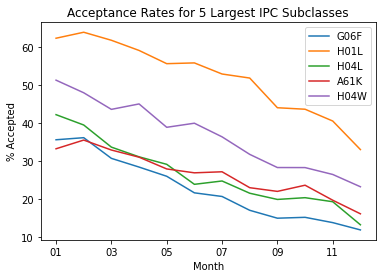

In [ ]:
ax = metadata_2016_filing_date[["G06F", "H01L", "H04L", "A61K", "H04W"]].plot(kind='line', title='Acceptance Rates for 5 Largest IPC Subclasses')
ax.set_ylabel("% Accepted")
ax.set_xlabel("Month")

EXAMINER ART UNIT

In [ ]:
len(all_metadata_2016_df.examiner_art_unit.unique())

762

In [ ]:
all_metadata_2016_df['examiner_art_unit'].value_counts()[0:5]

2872    3574
2837    3435
2842    3200
3745    2744
2852    2738
Name: examiner_art_unit, dtype: int64

In [ ]:
#bin by month
#cols: month, total % accepted over that month
decision_to_str = {
      'REJECTED': 0, 
      'ACCEPTED': 1, 
      'PENDING': 2, 
      'CONT-REJECTED': 3, 
      'CONT-ACCEPTED': 4, 
      'CONT-PENDING': 5
  }

def map_filing_date_to_month(date):
  month = date[4:6]
  return month

metadata_2016_filing_date = all_metadata_2016_df[["filing_date", "ground_truth_decision", 'examiner_art_unit']]
top_5_art_unit_list = ['2872', '2837', '2842', '3745', '2852']

for index, row in metadata_2016_filing_date.iterrows():
  metadata_2016_filing_date.at[index, 'month'] = map_filing_date_to_month(row["filing_date"])
  metadata_2016_filing_date.at[index, 'total_count'] = 1
  if row["ground_truth_decision"] == "ACCEPTED":
    metadata_2016_filing_date.at[index, 'accept_count'] = 1
    metadata_2016_filing_date.at[index, 'reject_count'] = 0
  if row["ground_truth_decision"] == "REJECTED":
    metadata_2016_filing_date.at[index, 'reject_count'] = 1
    metadata_2016_filing_date.at[index, 'accept_count'] = 0
  if row["ground_truth_decision"] != "REJECTED" and row["ground_truth_decision"] != "ACCEPTED":
    metadata_2016_filing_date.at[index, 'reject_count'] = 0
    metadata_2016_filing_date.at[index, 'accept_count'] = 0
  
  
  if row['examiner_art_unit'] in top_5_art_unit_list:
    col_name = row['examiner_art_unit'] + '_count'
    metadata_2016_filing_date.at[index, col_name] = 1

metadata_2016_filing_date["output"] = metadata_2016_filing_date['ground_truth_decision'].map(decision_to_str)

display(metadata_2016_filing_date)

<ipython-input-107-bd64be82cabf>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_2016_filing_date["output"] = metadata_2016_filing_date['ground_truth_decision'].map(decision_to_str)


,filing_date,ground_truth_decision,examiner_art_unit,month,total_count,reject_count,accept_count,2837_count,2842_count,2872_count,3745_count,2852_count,output
0,20161222,PENDING,1761,12,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2
1,20161114,PENDING,2894,11,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2
2,20161231,PENDING,2891,12,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2
3,20160317,ACCEPTED,1711,03,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1
4,20160728,ACCEPTED,1624,07,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373250,20160205,PENDING,2886,02,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2
373251,20161213,ACCEPTED,2848,12,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1
373252,20161206,PENDING,3771,12,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2
373253,20161220,PENDING,2132,12,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2


In [ ]:
count_lists = ['2872_count', '2837_count', '2842_count', '3745_count', '2852_count']
accept_count_lists = ['2872_accept_count', '2837_accept_count', '2842_accept_count', '3745_accept_count', '2852_accept_count']
for index, row in metadata_2016_filing_date.iterrows():
  for i in range(len(count_lists)):
    col = count_lists[i]
    if row[col] == 1 and row["accept_count"] == 1:
      accept_col = accept_count_lists[i]
      metadata_2016_filing_date.at[index, accept_col] = 1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
metadata_2016_filing_date = metadata_2016_filing_date[["month",	"total_count", "reject_count", "accept_count", '2872_accept_count', '2837_accept_count', '2842_accept_count', '3745_accept_count', '2852_accept_count', '2872_count', '2837_count', '2842_count', '3745_count', '2852_count', "output"]].groupby("month").sum()
display(metadata_2016_filing_date)

,total_count,reject_count,accept_count,2872_accept_count,2837_accept_count,2842_accept_count,3745_accept_count,2852_accept_count,2872_count,2837_count,2842_count,3745_count,2852_count,output
month,,,,,,,,,,,,,,
01,26808.0,2975.0,11532.0,160.0,137.0,185.0,29.0,165.0,289.0,275.0,271.0,225.0,215.0,36134
02,29082.0,2967.0,12332.0,144.0,141.0,179.0,32.0,227.0,274.0,240.0,253.0,232.0,308.0,39898
03,34841.0,3042.0,13912.0,175.0,116.0,191.0,17.0,206.0,360.0,284.0,332.0,260.0,266.0,49686
04,29296.0,2454.0,10823.0,130.0,117.0,147.0,10.0,122.0,259.0,258.0,254.0,247.0,157.0,42861
05,29961.0,2212.0,10527.0,117.0,88.0,146.0,8.0,130.0,292.0,231.0,241.0,266.0,175.0,44971
06,34986.0,2179.0,11209.0,123.0,138.0,148.0,13.0,143.0,313.0,315.0,266.0,295.0,181.0,54405
07,27824.0,1612.0,8336.0,75.0,109.0,114.0,4.0,158.0,237.0,224.0,235.0,198.0,253.0,44088
08,32808.0,2227.0,9082.0,101.0,140.0,135.0,14.0,185.0,296.0,312.0,253.0,229.0,301.0,52080
09,33882.0,1437.0,8388.0,86.0,115.0,126.0,7.0,172.0,296.0,412.0,276.0,222.0,271.0,56502


In [ ]:
for i in range(len(count_lists)):
  name = count_lists[i][0:4]
  metadata_2016_filing_date[name] = metadata_2016_filing_date[accept_count_lists[i]].div(metadata_2016_filing_date[count_lists[i]]).apply(lambda x: x*100)

display(metadata_2016_filing_date)

,total_count,reject_count,accept_count,2872_accept_count,2837_accept_count,2842_accept_count,3745_accept_count,2852_accept_count,2872_count,2837_count,2842_count,3745_count,2852_count,output,2872,2837,2842,3745,2852
month,,,,,,,,,,,,,,,,,,,
01,26808.0,2975.0,11532.0,160.0,137.0,185.0,29.0,165.0,289.0,275.0,271.0,225.0,215.0,36134,55.363322,49.818182,68.265683,12.888889,76.744186
02,29082.0,2967.0,12332.0,144.0,141.0,179.0,32.0,227.0,274.0,240.0,253.0,232.0,308.0,39898,52.554745,58.750000,70.750988,13.793103,73.701299
03,34841.0,3042.0,13912.0,175.0,116.0,191.0,17.0,206.0,360.0,284.0,332.0,260.0,266.0,49686,48.611111,40.845070,57.530120,6.538462,77.443609
04,29296.0,2454.0,10823.0,130.0,117.0,147.0,10.0,122.0,259.0,258.0,254.0,247.0,157.0,42861,50.193050,45.348837,57.874016,4.048583,77.707006
05,29961.0,2212.0,10527.0,117.0,88.0,146.0,8.0,130.0,292.0,231.0,241.0,266.0,175.0,44971,40.068493,38.095238,60.580913,3.007519,74.285714
06,34986.0,2179.0,11209.0,123.0,138.0,148.0,13.0,143.0,313.0,315.0,266.0,295.0,181.0,54405,39.297125,43.809524,55.639098,4.406780,79.005525
07,27824.0,1612.0,8336.0,75.0,109.0,114.0,4.0,158.0,237.0,224.0,235.0,198.0,253.0,44088,31.645570,48.660714,48.510638,2.020202,62.450593
08,32808.0,2227.0,9082.0,101.0,140.0,135.0,14.0,185.0,296.0,312.0,253.0,229.0,301.0,52080,34.121622,44.871795,53.359684,6.113537,61.461794
09,33882.0,1437.0,8388.0,86.0,115.0,126.0,7.0,172.0,296.0,412.0,276.0,222.0,271.0,56502,29.054054,27.912621,45.652174,3.153153,63.468635


Text(0.5, 0, 'Month')

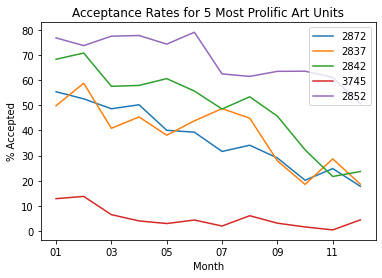

In [ ]:
ax = metadata_2016_filing_date[["2872",	"2837",	"2842",	"3745",	"2852"]].plot(kind='line', title='Acceptance Rates for 5 Most Prolific Art Units')
ax.set_ylabel("% Accepted")
ax.set_xlabel("Month")

In [ ]:
ax = metadata_2016_filing_date[["2872",	"2837",	"2842",	"3745",	"2852"]].plot(kind='line', title='Acceptance Rates for 5 Most Prolific Art Units')
ax.set_ylabel("% Accepted")
ax.set_xlabel("Month")